# Lesson 1 - Introduction to Images and Working with them in Python

Welcome! In this notebook, we will go through some basic image processing in Python and familiarize ourselves with different utilities that can be useful for any computer vision pipeline, utilities provides through libraries like numpy, napari, skimage, glob, tqdm and more.

### Working with Conda Environment and Installing libraries

To ensure a clean and isolated working environment, we will be using [conda](https://anaconda.org), a popular package management system and environment manager for Python. Conda allows us to create and manage virtual environments with specific dependencies for our project, which can help avoid conflicts between different packages and ensure reproducibility.

Here are the steps to open a Conda environment:

1. Open Anaconda or Miniconda: If you have Anaconda or Miniconda installed on your machine, open the Anaconda Navigator or the Conda command prompt, respectively.


2. Create a New Conda Environment: In the Conda command prompt, run the following command to create a new environment with a specific Python version:

`conda create -n my_env python=3.9`

**Replace "my_env" with the name you want to give to your environment, and "python=3.8" with the desired Python version.**

3. In the Conda command prompt, run the following command to activate the environment:

`conda activate my_env`

4. Install libraries: With the Conda environment activated, we can now install the required packages. In the Conda command prompt, run the following commands to install NumPy, Napari, plt, and nd2:

`pip install "napari[all]"`

`conda install numpy`

`conda install -c conda-forge matplotlib`

`pip install nd2`

5. Verify the Installation: To verify that NumPy and Napari are successfully installed, you can run the following Python code in your Jupyter notebook:

```python
import numpy as np
import napari
import nd2
import matplotlib
```
If there are no errors, you are all set to start working with images using NumPy and Napari in your Conda environment!

With NumPy and Napari installed, you now have the necessary tools to manipulate and analyze par-seqFISH images in Python. Let's move forward and explore the exciting world of image analysis and visualization in the next sections!

### Downloading the Data
To perform image analysis in this notebook, we will need to download some data from a provided link. Please follow the instructions below:

1. Open the link: https://weizmann.box.com/s/mtf7jv2vr75m4nsqtmmdiktpgx4swoav in your web browser.

2. Click on the "Download" button to download the data file to your local machine.

3. Once the download is complete, locate the downloaded file on your machine. It may be in your "Downloads" folder or the default download location of your web browser.

4. Create a folder named "data" in the same directory where your Jupyter Notebook is located. You can do this using the file explorer or by running the following command in a code cell in your Jupyter Notebook:

```python
import os

# Create a directory named "data" if it doesn't exist
if not os.path.exists("data"):
    os.makedirs("data")
```

5. Move the downloaded data file into the "data" folder that you just created.

6. You are now ready to access the downloaded data in your Jupyter Notebook for further image analysis.

### Images as arrays 

Images are represented as numpy arrays of shape (height, width, channels).

![RGB image as a numpy array](asserts/image_as_array.png)

<div style="text-align: right"> Credit: <a href="https://e2eml.school/convert_rgb_to_grayscale.html">Brandon Rohrer’s Blog</a></div>


Multiple utilities/packages exist to read images from files in Python,
we will use `nd2.ND2File` from [nd2 library](https://pypi.org/project/nd2/).


If you look in the directory containing this notebook, you will find a folder called data which includes some nd2 files. 

Let's load one image.

In [1]:
import nd2

path=r'data/Count00000_Point0000_ChannelPHASE 60x-100x PH3,DAPI,A488,A555,A647_Seq0000.nd2'
img = nd2.ND2File(path)

### Extracting Image Data and Metadata

Now that we have loaded the image using the "nd2" library, we can extract the image data and metadata from the "img" object. 

**Image Data Extraction:**

To extract the image data as a NumPy array, we can use the "asarray()" method provided by the "nd2" library. The extracted image data will be a 3D NumPy array, where the first dimension represents the channel, and the second and third dimensions represent the row and column indices, respectively. Here's an example:

```python
# Extract the image data as a NumPy array
image = img.asarray()
```
The resulting "image" variable will contain the image data as a NumPy array, which can be further processed and analyzed using various NumPy and image processing functions.


In [2]:
# Extract the image data as a NumPy array
import numpy as np
image = img.asarray()

### Exploring Image Properties

Now that we have imported the `nd2` package and loaded an image from the provided path, let's explore some properties of the image.

1. **Image Shape:** To find out the shape of the image, you can simply print the `shape` attribute of the `img` object, like this:

    ```python
    print("Image Shape:", img.shape)
    ```





In [3]:
#What is the shape of the image? (e.g., (height, width, channels, z axis))

image.shape

(15, 5, 2048, 2048)

2. **Channel Ranges:** Next, let's determine the range of intensity values for each channel in the image. You can use the `min()` and `max()` functions along with the `channels` attribute of the `img` object to obtain the minimum and maximum intensity values for each channel.



In [4]:
#What is the range of intensity values for each channel in the image? (e.g., Channel 1 Range: min = 0, max = 255)

for channel in range(image.shape[1]):
    print(f'{channel=}, range {image[:,channel,...].min()} - {image[:,channel,...].max()}')

channel=0, range 323 - 39080
channel=1, range 1360 - 18025
channel=2, range 462 - 3757
channel=3, range 279 - 65535
channel=4, range 543 - 65377



3. **Metadata Extraction:** Image metadata can provide valuable information about the acquisition settings, microscope parameters, and other experimental details. You can extract the metadata from the `img` object using the `metadata` attribute, like this:

    ```python
    image_metadata = img.metadata
    ```

    Please answer the following question: What information can you gather from the extracted metadata? 

Take a moment to explore the uploaded image and answer the questions above. Understanding the properties and metadata of the image will help us in further analysis and interpretation of the data. Feel free to refer to the `nd2` documentation for more details on working with ND2 images.


In [5]:
#What information can you gather from the extracted metadata? 

image_metadata = img.metadata
for channel in image_metadata.channels:
    channel_name = channel.channel.name
    print(channel_name)

PHASE 60x-100x PH3
DAPI
A488
A555
A647


### Displaying Image using Matplotlib

In addition to exploring the image properties, we can also visualize the image using the Matplotlib library. Matplotlib provides various functions to display images, such as `imshow()`.

To display the loaded image, you can use the following code:

```python
import matplotlib.pyplot as plt

# Display the first channel of the image
channel = img.channels[0] # Choose a channel to display
plt.imshow(img[channel], cmap='gray')
plt.title('Image Channel: ' + channel)
plt.colorbar()
plt.show()
```
This code snippet uses `imshow()` function to display the image data from a selected channel using a grayscale colormap. The `title()` function sets the title of the plot, and `colorbar()` function adds a colorbar to the plot for intensity scale.

You can also customize the display properties such as `colormap`, `colorbar`, and other visual settings as needed. Matplotlib provides extensive documentation for further customization options.

Please go ahead and use the above code to display the image, and experiment with different channels and visualization settings as needed. Visualizing the image can help you gain insights into the data and better understand the characteristics of the image.

Note: Make sure to run the `plt.show()` function to display the plot in the notebook.

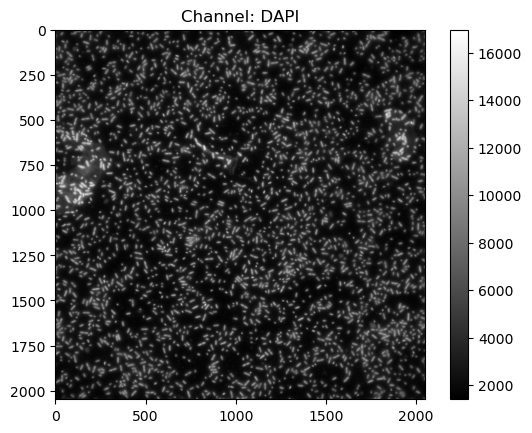

In [6]:
import matplotlib.pyplot as plt

channel = 1 # Choose a channel to display
z = 9
plt.imshow(image[9,channel,...], cmap='gray')
plt.title('Channel: ' + image_metadata.channels[channel].channel.name)
plt.colorbar()
plt.show()

### Image Slicing and Cropping

Now that we have loaded the image, let's explore how to extract and manipulate regions of interest (ROI) from the image using image slicing and cropping.

Image Slicing:

Image slicing allows you to extract specific portions of the image by indexing the image data. You can use square brackets with colon (':') notation to specify the range of indices for each dimension. For example:

```python
# Extract a slice from the image
image_slice = img[z, channel, start_row:end_row, start_col:end_col]
```
Try experimenting with different values for z, start_row, end_row, start_col, and end_col to extract and crop different regions of the image. You can also visualize the extracted or cropped regions using Matplotlib to visually inspect the results.

Please go ahead and try slicing and cropping the image using the provided instructions, and feel free to ask any questions or seek clarification if needed.


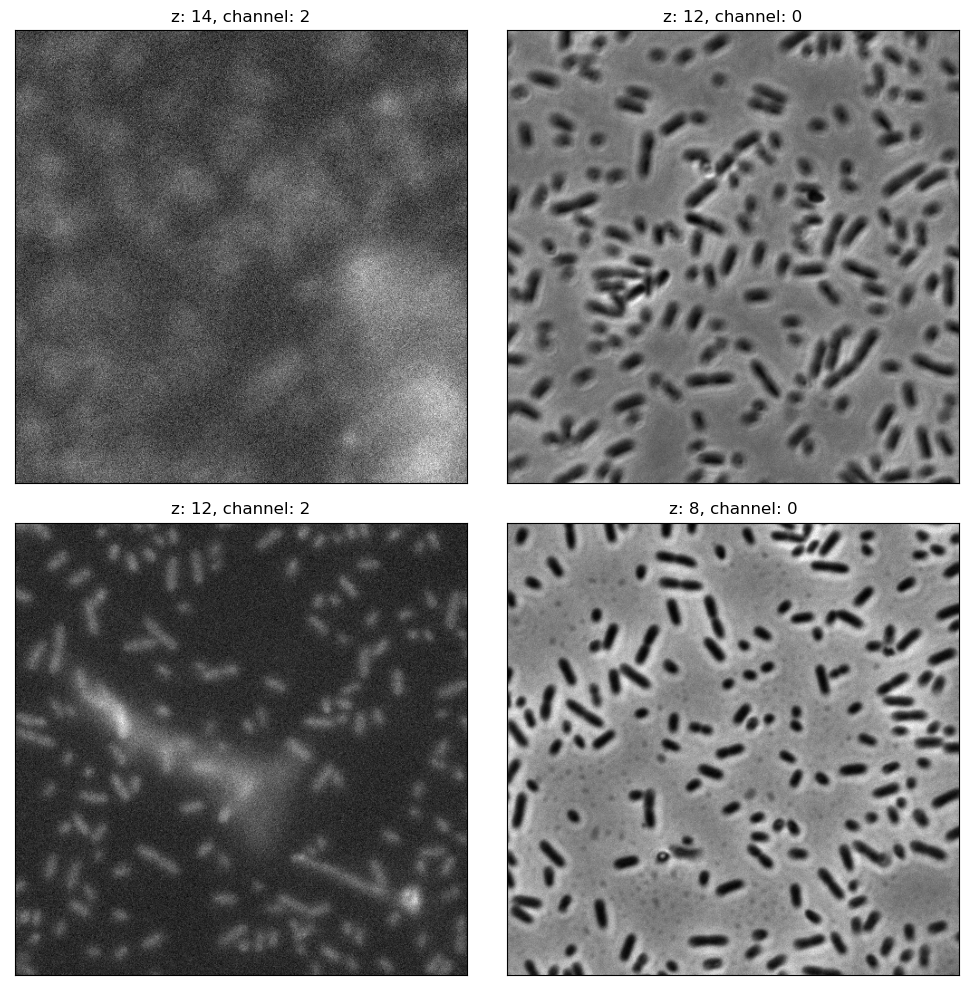

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define crop size and number of crops
crop_size = 500
num_crops = 4

# Create subplot with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Loop through each subplot and generate crops
for i in range(2):
    for j in range(2):
        # Randomly choose z, channel, and region
        z = np.random.randint(0, 15)
        channel = np.random.randint(0, 5)
        x = np.random.randint(0, 2048 - crop_size)
        y = np.random.randint(0, 2048 - crop_size)
        
        # Extract the crop
        crop = image[z, channel, y:y+crop_size, x:x+crop_size]
        
        # Plot the crop on the current subplot
        axes[i, j].imshow(crop, cmap='gray')
        axes[i, j].set_title(f'z: {z}, channel: {channel}')

# Remove tick labels from subplots
for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

# Show the plot
plt.tight_layout()
plt.show()



### Using Napari for Image Visualization and Analysis
[Napari](https://napari.org/stable/) is a popular open-source Python library for visualizing and analyzing multi-dimensional image data. It provides a user-friendly interface for exploring and manipulating images in a flexible and interactive way. Let's briefly introduce Napari and then provide an exercise for you to try.

Napari allows you to easily load images, visualize them in different channels, and explore various image properties. You can also apply various image processing operations, such as contrast stretching, gamma correction, and filtering, to enhance the visualization of your images. Additionally, Napari provides tools for annotating images, measuring image features, and performing region-of-interest (ROI) analysis.

Now, let's try an exercise to load an image with multiple layers into Napari and explore some of its features. Please upload an image of your choice using the provided code snippet:

```python
# Import the necessary libraries
import napari

# Load the image layers using napari
viewer = napari.Viewer() # Open napari viewer
viewer.add_image(image_layer1, name='Channel 1') # Upload image layer 1
viewer.add_image(image_layer2, name='Channel 2') # Upload image layer 2

# Upload a label layer if available
viewer.add_labels(label_layer, name='Labels') # Upload label layer
```

Once you have loaded the image layers into Napari, you can use the Napari viewer to interactively explore and manipulate the images. You can adjust the display properties, such as interpolation, LUT, and contrast limits, for each image layer independently. You can also use the Zoom and Pan tools to navigate and explore different regions of the images. Additionally, you can use the Labels layer to overlay segmentation masks or annotations on top of the image layers for further analysis.

Try playing with the following features:

**Interpolation:** Change the interpolation method used for image display to see the effect on image quality for each image layer.

**LUT (Lookup Table):** Apply different lookup tables to each image layer to adjust the color mapping.

**Contrast Limits:** Adjust the contrast limits for each image layer to control the display range of pixel intensities.

**Zooming and Panning:** Use the Zoom and Pan tools to navigate and explore different regions of the images.

**Labels Layer:** Use the Labels layer to overlay segmentation masks or annotations on top of the image layers for further analysis.

Feel free to experiment with different settings and explore the capabilities of Napari for image visualization and analysis. Don't forget to save your Jupyter Notebook and share it with your peers for further discussions and collaborations!

Note: If you encounter any issues or have questions while using Napari, please refer to the official Napari documentation for detailed instructions and troubleshooting tips.

In [15]:
import napari

colors = ['gray', 'blue', 'green', 'red', 'yellow']
z = 10

# Create a Napari viewer
viewer = napari.Viewer()

# Add individual channel images to the viewer
for i, channel in enumerate(image_metadata.channels):
    channel_name = channel.channel.name
    viewer.add_image(image[z, i,...], name=channel_name, colormap = colors[i], blending = 'additive')

### Stacking the Z-Axis for Image Analysis
As you may have noticed, the image data for each channel in the provided dataset consists of multiple layers along the Z-axis, representing different sections of the sample volume. This Z-stack data can be utilized in various ways to gain insights from the image data.

I encourage you to explore different ways of stacking the Z-axis to generate different projections or views of the sample volume. For example, you can try averaging the Z-stack to create a maximum intensity projection (MIP) or a mean intensity projection (MIP) to visualize the overall signal distribution in the sample. Alternatively, you can select specific Z-planes or ranges to create custom views or sections of the sample volume that may be of interest for your analysis.

Experimenting with different ways of stacking the Z-axis can provide valuable insights and help you better understand the data in the context of your analysis goals.

In [16]:
import napari
import numpy as np

colors = ['gray', 'blue', 'green', 'red', 'yellow']

# Create a Napari viewer
viewer = napari.Viewer()

# Add individual channel images to the viewer
for i, channel in enumerate(image_metadata.channels):
    channel_name = channel.channel.name
    channel_mip = np.max(image[:, i, ...], axis=0)  # Calculate MIP for current channel
    viewer.add_image(channel_mip, name=channel_name + ' MIP', colormap=colors[i], blending='additive')